In [107]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D

In [108]:
#Import the required data sets
iris = datasets.load_iris()
data = iris.data
#This set gives us additional information that we can use, headings etc.
data2 = pd.read_csv("iris.csv")
data2.info


<bound method DataFrame.info of      Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

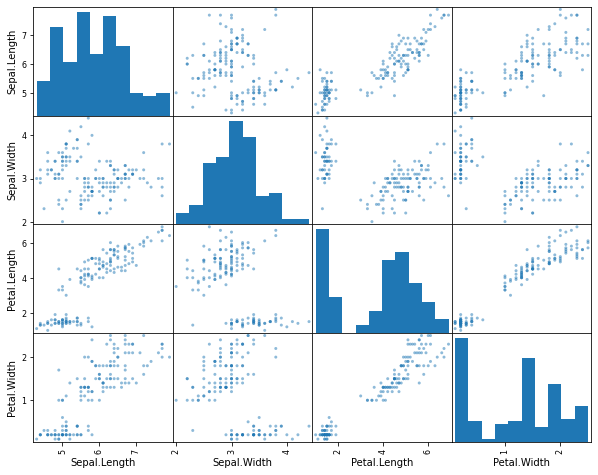

In [109]:
#Have a rought look at the type of association and number of clusters in the dataset
from matplotlib import cm
from matplotlib import colors
cmap = cm.get_cmap('Spectral')

matrix_of_scatterplots =scatter_matrix(data2, figsize=(10,8),diagonal='hist',cmap =cmap)


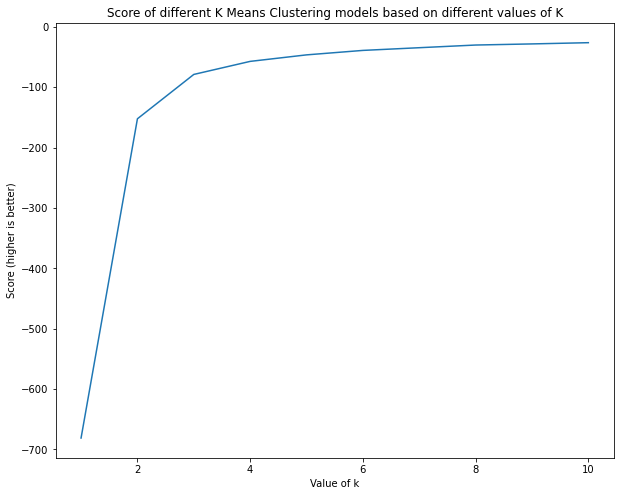

In [110]:
#Visually 2 clusters appears to be most common

#Take the iris dataset and try different numbers of clusters
#We are doing scoring of each number of clusters
scores = []
trial_num_clus = 11
for i in range(1,trial_num_clus ):
    model = KMeans(n_clusters=i) #So we are running i clusters
    model.fit(data)
    
    # Score the model
    scores.append(model.score(data))
    
#Now plot the results, which number of clusters causes the greatest change in gradient
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(list(range(1,trial_num_clus)), scores)

ax.set_xlabel("Value of k")
ax.set_ylabel("Score (higher is better)")
ax.set_title("Score of different K Means Clustering models based on different values of K")

plt.show()

In [111]:
#I have selected 3 clusters
model2 = KMeans(n_clusters=3)
#Now run the model
model2.fit(data)


KMeans(n_clusters=3)

In [112]:
#This is our allocation of clusters in number terms
data3 =model2.labels_
data3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [113]:
model2.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [114]:
#Next assign known labels to the model number above

In [115]:
y_Predicted=[]
for i in range(150):
    if data3[i] == 0:
        y_Predicted.append("setosa")
    if data3[i] == 1:
        y_Predicted.append("versicolor")
    if data3[i] == 2:
        y_Predicted.append("virginica")
y_predicted = np.array(y_Predicted)       
#print(y_predicted) 
y_Actual = data2["Species"]

#So now we have the actual assignned names and predicted, lets 

In [116]:
#Convert to array form
y_actual = np.array(y_Actual)

In [117]:
data4=(y_actual,y_predicted)

In [118]:
#Here we run the confusion matrix
confusion_matrix = pd.crosstab(data4[0], data4[1], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted   setosa  versicolor  virginica
Actual                                   
setosa          50           0          0
versicolor       0          48          2
virginica        0          14         36


In [119]:
#Great setosa, good versicolor, medium for virginica

In [120]:
#Now do an accuracy check as requested

In [121]:
metrics.adjusted_rand_score(y_actual,y_predicted)

0.7302382722834697

In [122]:
#**********************************************************
#Section 2 find two features that would return a better result

In [123]:
data5 = [data2['Sepal.Length'],data2['Sepal.Width']]

In [124]:
model3 = KMeans(n_clusters=2)

model3.fit(data5)
#This time it only allows me to run 2 clusters

KMeans(n_clusters=2)

In [125]:
#This is our allocation of clusters in number terms
data6 =model2.labels_
data6

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [126]:
y_Predicted2=[]
for i in range(150):
    if data6[i] == 0:
        y_Predicted2.append("setosa")
    if data6[i] == 1:
        y_Predicted2.append("versicolor")
    if data6[i] == 2:
        y_Predicted2.append("virginica")
y_predicted2 = np.array(y_Predicted2)       
#print(y_predicted) 
y_Actual = data2["Species"]


In [127]:
y_actual = np.array(y_Actual)

In [128]:
model3.cluster_centers_

array([[3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
        3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
        3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.6, 3. ,
        3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3, 3.2, 3.2,
        3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2, 2.9, 2.9,
        3.1, 3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8, 3. ,
        2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. , 2.5, 2.6,
        3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5, 2.8, 3.3, 2.7, 3. , 2.9,
        3. , 3. , 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3. , 2.5, 2.8, 3.2, 3. ,
        3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3. , 2.8, 3. ,
        2.8, 3.8, 2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. , 3.1, 3.1, 3.1, 2.7,
        3.2, 3.3, 3. , 2.5, 3. , 3.4, 3. ],
       [5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
        4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       

In [129]:
data7=(y_actual,y_predicted2)

In [130]:
confusion_matrix = pd.crosstab(data7[0], data7[1], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted   setosa  versicolor  virginica
Actual                                   
setosa          50           0          0
versicolor       0          48          2
virginica        0          14         36


In [131]:
#This kept changing, one good result in image below, at the moment it's returning the same result

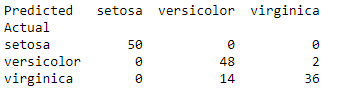

In [132]:
#Now do an accuracy check as requested
metrics.adjusted_rand_score(y_actual,y_predicted2)

0.7302382722834697

In [ ]:
#I am a bit confused on the 4D and 2D plots, hear more on Tuesday

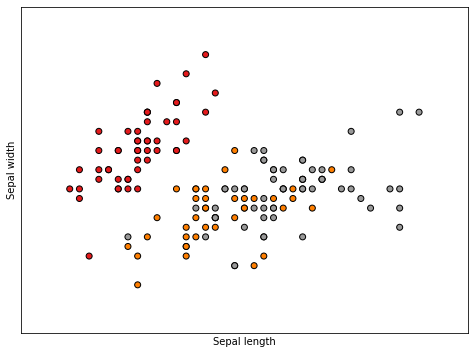

In [133]:

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()